## Exploratory Analysis
There are thirteen features and one target as below:
* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest 
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    
* target: Heart disease (0 = no, 1 = yes)



In [1]:
# !pip install shap
# !pip install eli5
# !pip install xgboost
!pip install umap

# !pip uninstall scikit-learn -y
# !pip install scikit-learn==1.2.2

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import os
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
from sklearn import preprocessing
import itertools
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
#from sklearn.inspection.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier
import eli5
from eli5.sklearn import PermutationImportance
import shap
from mpl_toolkits.mplot3d import Axes3D

There is 1 csv file in the current version of the dataset:


In [2]:
print(os.listdir('./input'))#C:/Users/Admin/Desktop/client/SS-Heart_Disease

['heart.csv']


##  DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular learning method utilized in model building and machine learning algorithms. This is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density.



In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import umap ###install with "pip install umap-learn"
import matplotlib.pyplot as plt
import seaborn as sns ### install using pip install seaborn
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.cluster.hierarchy import dendrogram

In [5]:
filename = "./input/heart.csv"
class Unsupervised:
    #My Variables, y_resampled
    pd_data = []
    models = []
    labels = []
    ##clusterd data
    X_resampled = []
    y_resampled = []
    reduced_pd_data = []
    scaled_data = []
    scaler = MinMaxScaler()
    
    # Constructor
    def __init__(self, file):
        # Call Data Loader
        self.load_data(file)
        self.prep_data()
        self.scale_data()
        #self.reduce_data()

    # Load dataset for analysis
    def load_data(self, file):
        self.pd_data = pd.read_csv(file)
        #make a copy of the raw data for future use
        self.raw_data = self.pd_data.copy(deep=True)
    
    def get_data(self):
        return self.pd_data
    
    # Prepare data - Seperate target from data
    def prep_data(self):
        self.labels = self.pd_data['target']
        del self.pd_data["target"]
    
    # helper to display target and head of the data
    def print_data(self):
        display(self.raw_data.head())
        display(self.pd_data.head())
        display(self.labels)
    
    # Pair plot analysis to display relationships between features in the dataset
    def plot_data(self):
        sns_plot = sns.pairplot(self.raw_data, hue='target')
        #sns.pairplot(self.raw_data, vars=self.raw_data.columns[:-1],hue='target')\
        #save plot to disk for report
        sns_plot.savefig("pairplot.png")
    
    def data_analysis(self):
        self.print_data()
        self.plot_data()
        
    def plot_clusters(self):
        #model = AgglomerativeClustering(n_clusters=3)
        #self.cluster_labels = model.fit_predict(self.scaled_data)
        self.reduce_data()
        sns.scatterplot(x='UMAP Dim. #1', y='UMAP Dim. #2',
            hue='cluster_labels', data=self.reduced_pd_data)
    
    def get_cluster_labels(self):
        model = AgglomerativeClustering(n_clusters=3)
        cluster_labels = model.fit_predict(self.scaled_data)
        return cluster_labels
    
    # Scale Data
    def scale_data(self):
        data_for_scaling = self.pd_data.values
        # scaler = MinMaxScaler()
        self.scaled_data = self.scaler.fit_transform(data_for_scaling)
        
        #for debuging purposes
        #print(self.scaled_data[0:5])
    
    # Recude Data
    def reduce_data(self):       
        data_reducer = umap.UMAP()
        
        umap_data = data_reducer.fit_transform(self.scaled_data)

        scaled_umap_data = self.scaler.fit_transform(umap_data)

        self.reduced_pd_data = pd.DataFrame(scaled_umap_data,columns=['UMAP Dim. #1', 'UMAP Dim. #2'])

        self.reduced_pd_data['cluster_labels'] = self.get_cluster_labels()
        
        #for debuging purposes
        #print(self.reduced_pd_data)
    


    def compute_dbscan(self, _data, _truelabels):
        # Compute DBSCAN
        db = DBSCAN(eps=0.8, min_samples=16).fit(_data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        print('Estimated number of clusters: %d' % n_clusters_)
        print('Estimated number of noise points: %d' % n_noise_)


        self.plot_dbscan(_data, labels, n_clusters_, core_samples_mask)

    def plot_dbscan(self, _data, labels, n_clusters_, core_samples_mask):
        # Black removed and is used for noise instead.
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = _data[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 3], xy[:, 7], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = _data[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 3], xy[:, 7], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.show()
        
    def predict(self, _data, eps=[0.1*i for i in range(1,20)], min_samples=list(range(1,11))):
        self.eps = eps
        self.min_samples = min_samples
        _models = []
        _labels = []
        for e in eps:
            for ms in min_samples:
                model = DBSCAN(eps=e, min_samples=ms).fit(_data)
                _models.append(model)
                _labels.append(model.fit_predict(_data))
        return _models, _labels
    
    def accuracy(self, target, _models, _labels):
        score = []
        for pred in _labels:
            score.append(self.max_score(pred, target))
        
        max_ind = np.argmax(score)
        best_model = _models[max_ind]
        print('Max accuracy {} with model {}'.format(score[max_ind], best_model))
        return best_model
    
    def max_score(self, pred, target):
        permutations = [[0, 1], [1, 0]]
        scores = []
        for perm in permutations:
            n_right = 0
            for label, t in zip([0, 1], perm):
                n_right += sum((pred == label)*(target == t)*1)
            scores.append(n_right/len(pred))
        return max(scores)
    
    def plot_dendrogram(self,model, **kwargs):
        # from: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
        # Create linkage matrix and then plot the dendrogram

        # create the counts of samples under each node
        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1  # leaf node
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count

        linkage_matrix = np.column_stack([model.children_, model.distances_,
                                          counts]).astype(float)

        # Plot the corresponding dendrogram
        dendrogram(linkage_matrix, **kwargs)

    
    def Density(self):
        mdls, lbls = self.predict(self.scaled_data)
        mytarget = self.labels
        np_lbl = mytarget.array #convert to np
        
        best_model = self.accuracy(np_lbl, mdls, lbls)
        
        # Try without age and sex features
        mdls, lbls = self.predict(self.scaled_data[:, 2:14])
        best_model_reduced = self.accuracy(np_lbl, mdls, lbls)
        
        self.compute_dbscan(self.scaled_data, self.labels)
        
   
    
    def plotHierarchy_elbow(self):
        # vary parameters
        thresh = list(range(10))
        agg_models = []
        n_clusters = []

        for t in thresh:
            model = AgglomerativeClustering(distance_threshold=t, n_clusters=None).fit(self.scaled_data)
            agg_models.append(model)
            n_clusters.append(model.n_clusters_)
            
        fig2, ax2 = plt.subplots()    
        ax2.plot(thresh, n_clusters, '-x')
        display(n_clusters)
        
        # plotting with agglomerative model labels
        # When non continuous values value features are incluter the plot is linear as opposed to being globular
        fig3, ax3 = plt.subplots()
        # age:0 vs Max: heart rate:7 -> Globular
        # age:0 vs sex: 1 -> linear
        ax3.scatter(self.scaled_data[:,0], self.scaled_data[:,7], c=agg_models[2].labels_.astype(float))

Max accuracy 0.5478547854785478 with model DBSCAN(eps=1.1, min_samples=1)
Max accuracy 0.6039603960396039 with model DBSCAN(eps=0.8, min_samples=6)
Estimated number of clusters: 3
Estimated number of noise points: 79


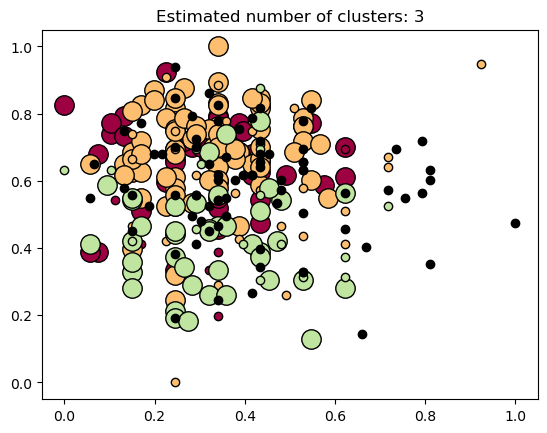

In [6]:
FinalProject = Unsupervised("./input/heart.csv")
# Second dataset used for comparision
# FinalProject = BIOF509Unsupervised("heart.csv")
#FinalProject.data_analysis()

# Use one alogrithm at a time
#FinalProject.BIOF509Kmeans()
FinalProject.Density()
#FinalProject.BIOF509Hierarchical()

In [7]:

df = pd.read_csv(filename)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's see percentage of the people who has heart disease.

In [8]:
df_target = df.groupby("target").size()
df_target

target
0    138
1    165
dtype: int64

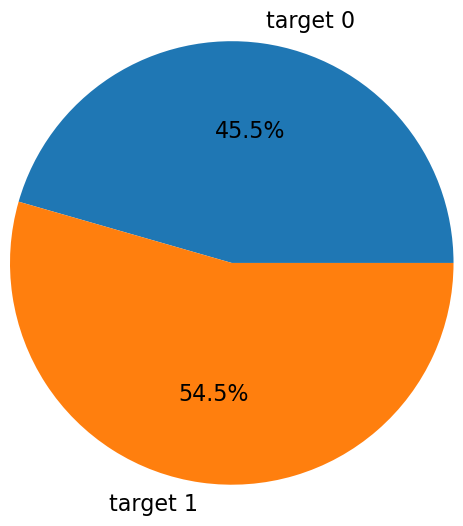

In [9]:
plt.pie(df_target.values, labels = ["target 0", "target 1"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

Over 50% people who was diagnosed heart disease

In [9]:
df_sex = df.groupby(["sex","target"]).size()
df_sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

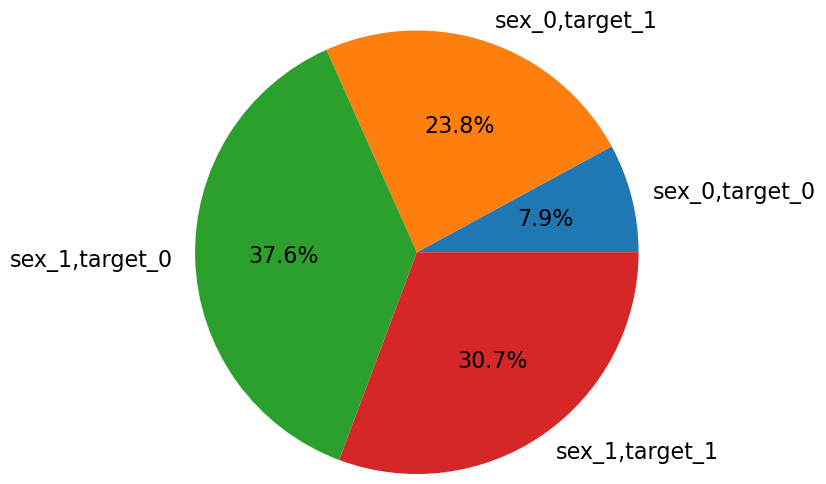

In [11]:
plt.pie(df_sex.values, labels = ["sex_0,target_0", "sex_0,target_1", "sex_1,target_0", "sex_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

The ratio of male has heart disease is 30.7%, a little bit higher than female.

Let's see how distribution of age is.

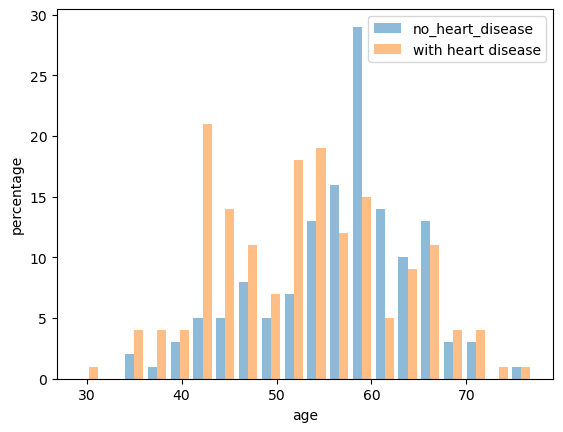

In [10]:
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()


The ratio get higher over the age of forty. That is, people who is over forty is under high risk of heart disease.

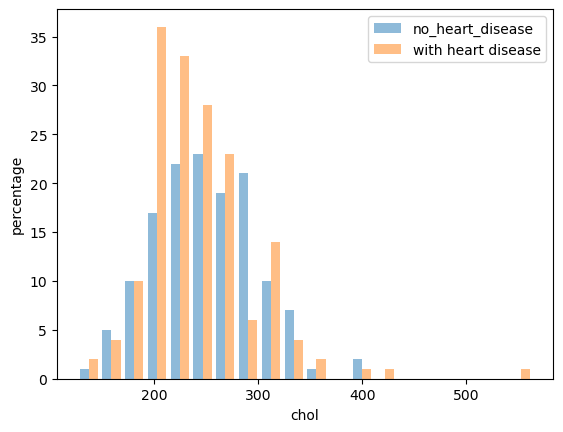

In [12]:
plt.hist([df[df.target==0].chol, df[df.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

Also, amounts of people having heart disease are over 200mg/dl of chol. According to the research, the normal value of chol should be lower than 200mg/dl.

How about the resting blood pressure?

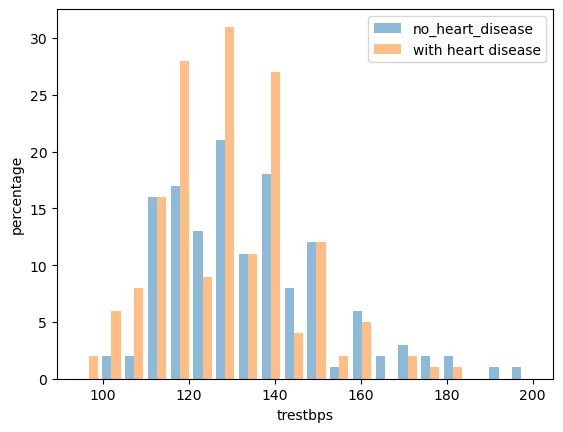

In [13]:
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

The ideal blood pressure should be lower than 120 mmHg. Whether the patients have heart disease or not , over 50% patients have higher blood pressure.

Maximum heart rate is negatively related to the age. Let's see the distribution.

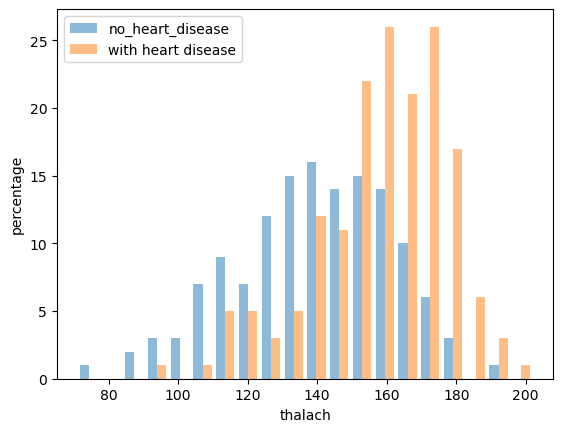

In [14]:
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"]) 
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.show()

Interesting outcome. It seems that the medium of patient with heart disease is higher. 

Before modeling the dataset, let's find out if there are outliers inside the dataset.
We check the contineous data by boxplot. 

In [15]:
df_1 = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
df_1.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


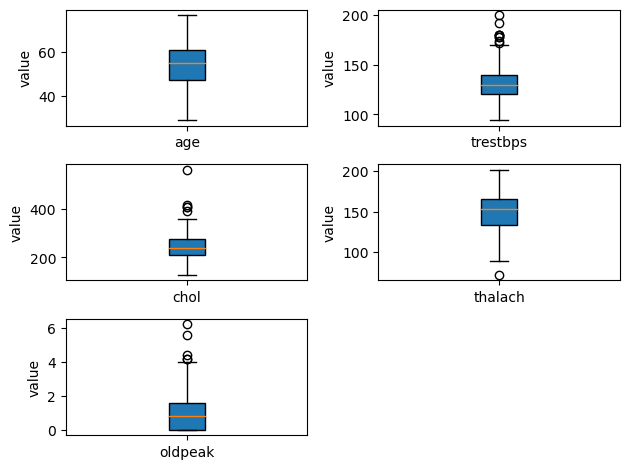

In [17]:
for item in df_1.columns:
    plt.subplot(3,2,list(df_1.columns).index(item)+1)
    plt.boxplot(df_1[item], patch_artist=True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

There are outliers in each features except age. We define the outliers that are not in the range of 3 sigma. Then remove the outliers.

In [16]:
infor = df.describe()

df2 = df[df.trestbps < infor.loc["mean", "trestbps"] + 3 * infor.loc["std", "trestbps"]]
df3 = df2[df.chol < infor.loc["mean", "chol"] + 3 * infor.loc["std", "chol"]]
df4 = df3[df.thalach > infor.loc["mean", "thalach"] - 3 * infor.loc["std", "thalach"]]
df_new = df4[df.oldpeak < infor.loc["mean", "oldpeak"] + 3 * infor.loc["std", "oldpeak"]]
df_new.head()

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Replace the name of category data and seperate them into different columns.

In [17]:
df_new.cp = df_new.cp.map({0:"asymptomatic", 1: "typical angina", 2:"atypical angina", 3:"non-anginal pain"})
df_new.sex = df_new.sex.map({0:"Female", 1:"Male"}) 
df_new.exang = df_new.exang.map({0:"exercise did not induce angina", 1:"exercise induced angina"})
df_new.slope = df_new.slope.map({1:"upsloping", 2:"flat", 3:"downsloping"})
df_new.thal = df_new.thal.map({1:"normal",2:"fixed defect", 3:"reversable defect"})
df_new = pd.get_dummies(df_new, drop_first = True)
df_new.head(10)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,target,sex_Male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,exang_exercise induced angina,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,1,0,150,2.3,0,1,True,False,True,False,False,False,True,False
1,37,130,250,0,1,187,3.5,0,1,True,True,False,False,False,False,False,False
2,41,130,204,0,0,172,1.4,0,1,False,False,False,True,False,False,False,False
3,56,120,236,0,1,178,0.8,0,1,True,False,False,True,False,False,False,False
4,57,120,354,0,1,163,0.6,0,1,False,False,False,False,True,False,False,False
5,57,140,192,0,1,148,0.4,0,1,True,False,False,False,False,True,True,False
6,56,140,294,0,0,153,1.3,0,1,False,False,False,True,False,True,False,False
7,44,120,263,0,1,173,0.0,0,1,True,False,False,True,False,False,False,True
8,52,172,199,1,1,162,0.5,0,1,True,True,False,False,False,False,False,True
9,57,150,168,0,1,174,1.6,0,1,True,True,False,False,False,False,False,False


## SMOTE + ENN



In [18]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

In [19]:
def test_sample_regular_pass_smote_enn(X,Y):
    RND_SEED=0
    smote = SMOTEENN(
        smote=SMOTE(sampling_strategy="auto", random_state=RND_SEED),
        enn=EditedNearestNeighbours(sampling_strategy="all"),
        random_state=RND_SEED,
    )
#     smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, Y)
    return X_resampled,y_resampled

Define the dataset for training and testing.

In [20]:
from sklearn.model_selection import train_test_split

predictors = df_new.drop("target",axis=1)
target = df_new["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [21]:
X_train_sm,Y_train_sm = test_sample_regular_pass_smote_enn(X_train,Y_train)

In [22]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42) 
                                                                                                                                  
xgb_model.fit(X_train_sm, Y_train_sm)

Y_pred_xgb = xgb_model.predict(X_test)

In [23]:
Y_pred_xgb.shape

(59,)

In [24]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
print("The accuracy score achieved using XGBoost and SMOTEENN is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost and SMOTEENN is: 84.75 %


To see which factors are significantly affect the heart disease, Xgboost library is a easy way to predict the result.
We should optimize the parameters first, so we assume different max depth of classification, learning rate and number of trees. 
Secondly, use crossvalid method to make sure the parameters is optimised.

In [25]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42) 
                                                                                                                                  
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [26]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")


The accuracy score achieved using XGBoost is: 77.97 %


In [27]:
X_train.shape

(235, 16)

In [28]:
X_train_sm.shape

(97, 16)

In [29]:
from collections import Counter
Counter(Y_train)

Counter({1: 134, 0: 101})

In [30]:
Counter(Y_train_sm)

Counter({0: 54, 1: 43})